In [116]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [117]:
df=pd.read_csv("train.csv")

In [118]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [119]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [120]:
df.shape

(7352, 563)

In [121]:
df_test = pd.read_csv("test.csv")

In [122]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [123]:
df_test.shape

(2947, 563)

In [124]:
#Check for null values in both train and test sets 

In [125]:
df.isnull().values.sum()

0

In [126]:
df_test.isnull().values.sum()

0

In [127]:
#Check for data imbalance by visualizing the data provided

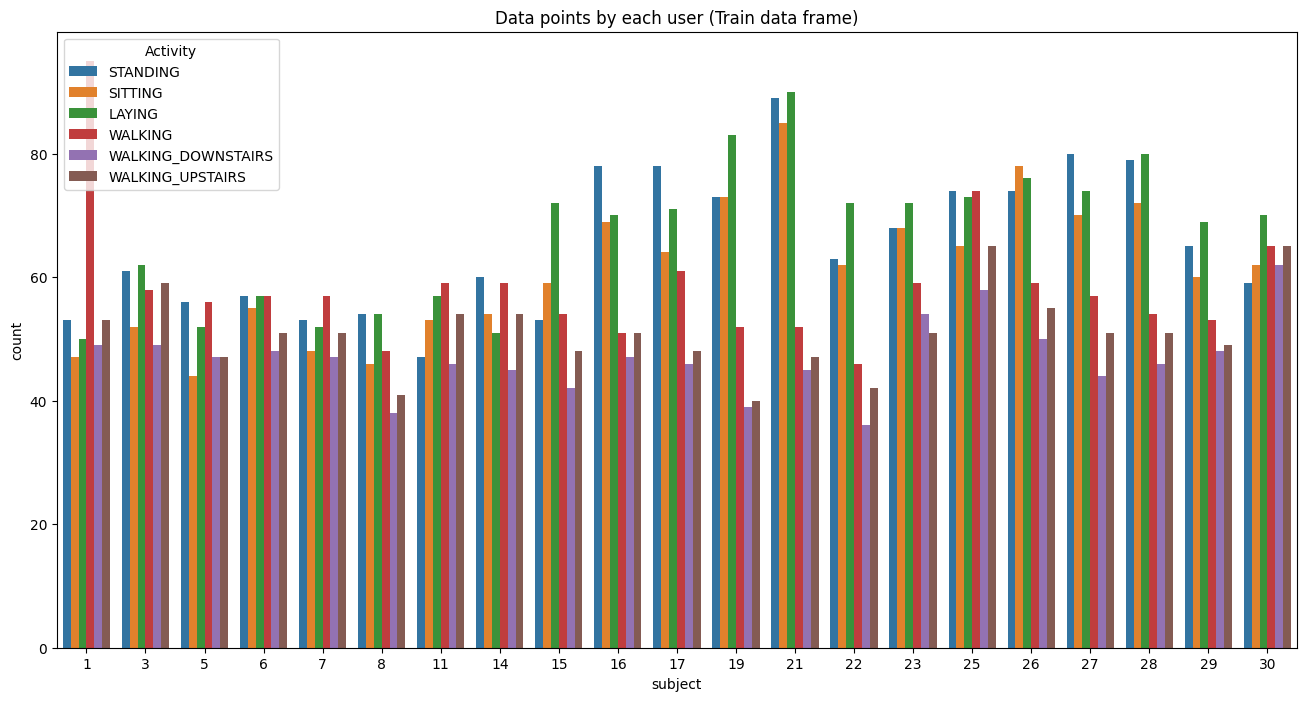

In [128]:
plt.figure(figsize=(16,8))
plt.title("Data points by each user (Train data frame)")
sns.countplot(x="subject",hue="Activity", data=df)
plt.show()

In [129]:
list(df.columns)

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

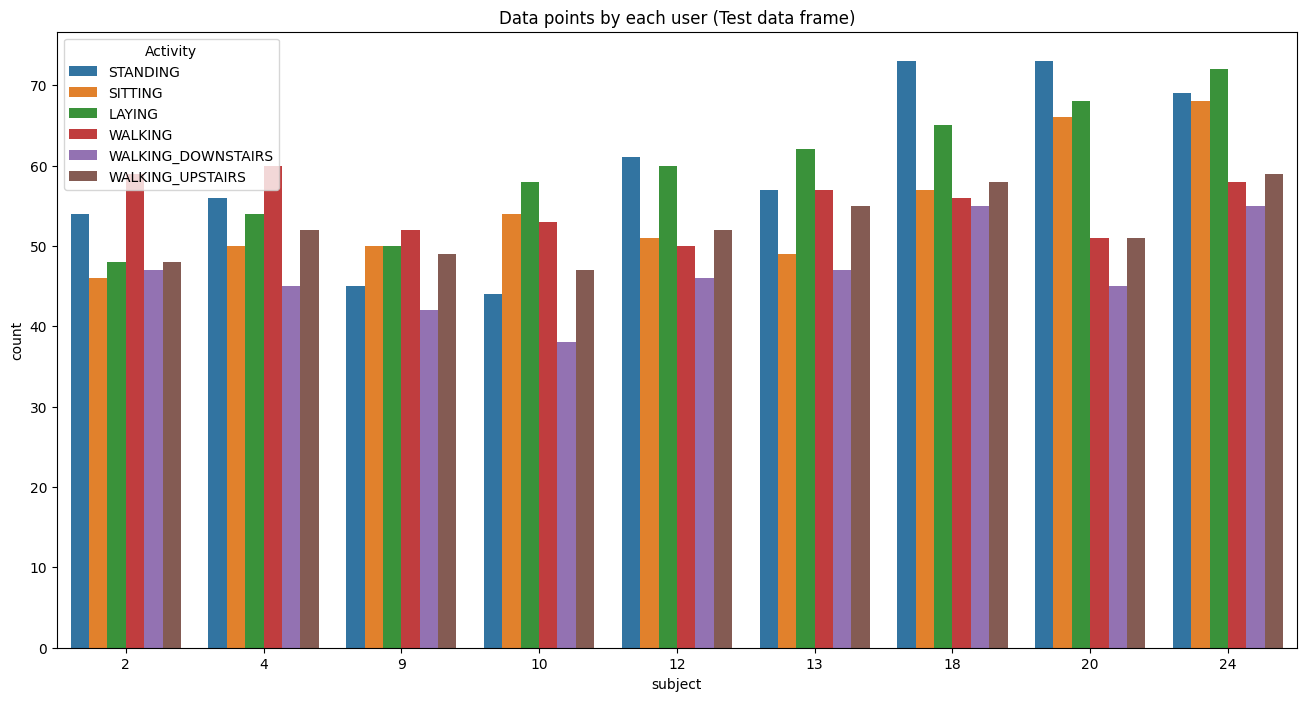

In [130]:
plt.figure(figsize=(16,8))
plt.title("Data points by each user (Test data frame)")
sns.countplot(x="subject",hue="Activity", data=df_test)
plt.show()

In [131]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


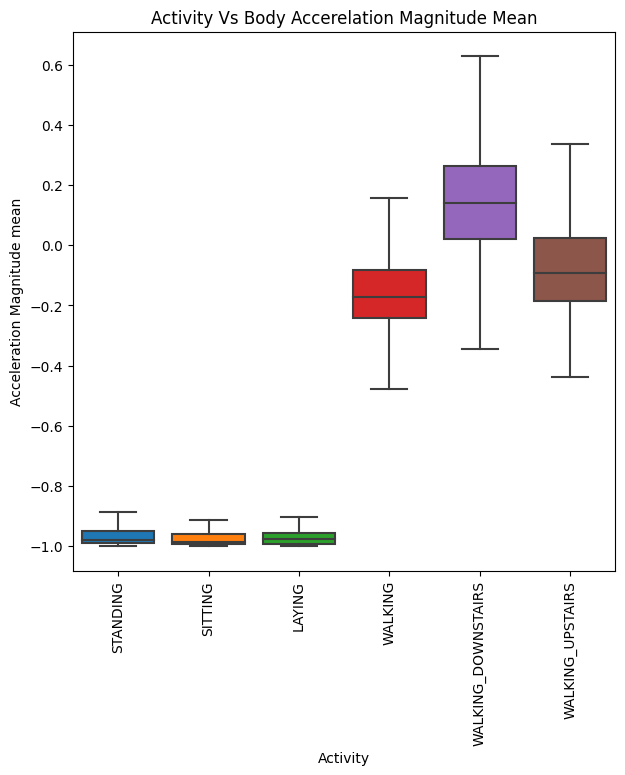

In [132]:
plt.figure(figsize=(7,7))
plt.title("Activity Vs Body Accerelation Magnitude Mean")
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

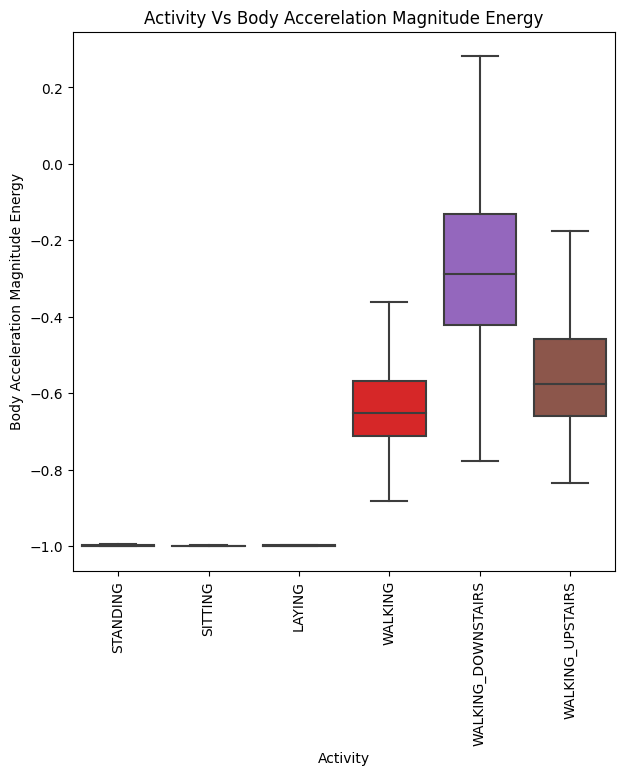

In [133]:
plt.figure(figsize=(7,7))
plt.title("Activity Vs Body Accerelation Magnitude Energy")
sns.boxplot(x='Activity', y='tBodyAccMag-energy()',data=df, showfliers=False, saturation=1)
plt.ylabel('Body Acceleration Magnitude Energy')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

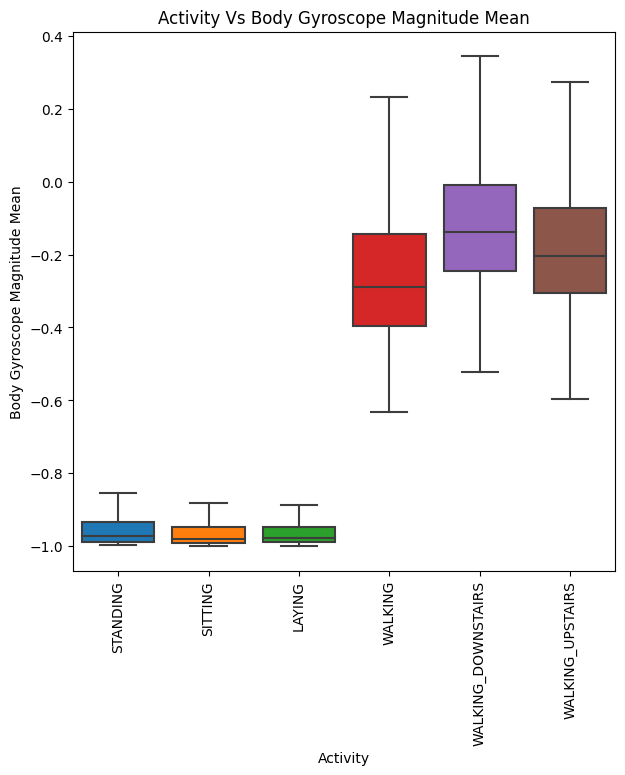

In [134]:
plt.figure(figsize=(7,7))
plt.title("Activity Vs Body Gyroscope Magnitude Mean")
sns.boxplot(x='Activity', y='tBodyGyroMag-mean()',data=df, showfliers=False, saturation=2)
plt.ylabel('Body Gyroscope Magnitude Mean')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

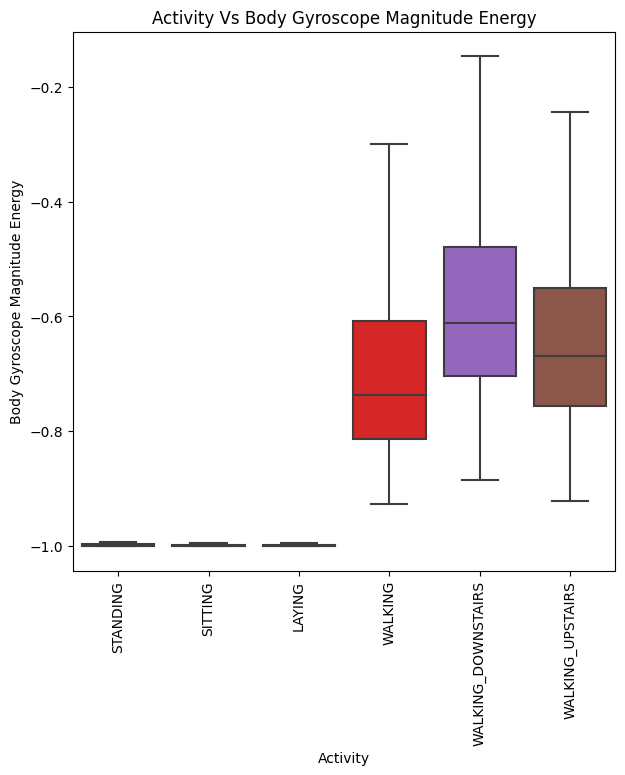

In [135]:
plt.figure(figsize=(7,7))
plt.title("Activity Vs Body Gyroscope Magnitude Energy")
sns.boxplot(x='Activity', y='tBodyGyroMag-energy()',data=df, showfliers=False, saturation=2)
plt.ylabel('Body Gyroscope Magnitude Energy')
#plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
#plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

In [136]:
# The data is quite high dimension so i got to reduce to size maybe by using PCA

In [137]:
#Lets normalize the data for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop(["Activity"],axis=1)

In [138]:
X.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1


In [139]:
y = df.Activity

In [140]:
y.head(5)

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

In [141]:
X=scaler.fit_transform(X)

In [142]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [143]:
X

array([[ 0.20064157, -0.0636826 , -0.41962845, ...,  0.40794614,
        -0.00756789, -1.8288513 ],
       [ 0.05594788,  0.03148567, -0.25390836, ...,  0.40911698,
         0.00787517, -1.8288513 ],
       [ 0.07351535, -0.04341648, -0.07629468, ...,  0.4102883 ,
         0.02650234, -1.8288513 ],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ...,  0.64059683,
         0.34870928,  1.4025149 ],
       [ 0.21586648, -0.02812252, -0.86770988, ...,  0.63147758,
         0.29327564,  1.4025149 ],
       [ 1.09620157,  0.12919873, -1.67268082, ...,  0.63274259,
         0.33396081,  1.4025149 ]])

In [144]:
dfx = pd.DataFrame(data=X,columns=df.columns[:-1])

In [145]:
#df.columns[:-1]

In [146]:
from sklearn.decomposition import PCA
pca = PCA (n_components = None)
dfx_pca = pca.fit(dfx)

In [147]:
dfx_pca

PCA()

In [148]:
dfx_pca.explained_variance_ratio_

array([5.06924500e-01, 6.56927463e-02, 2.80224134e-02, 2.49949733e-02,
       1.88496772e-02, 1.72315388e-02, 1.36869461e-02, 1.20273017e-02,
       9.96711954e-03, 9.63413035e-03, 8.58813927e-03, 7.99562881e-03,
       7.67143930e-03, 6.47479547e-03, 6.33271002e-03, 5.98706928e-03,
       5.86494641e-03, 5.74384082e-03, 5.67486618e-03, 5.26419437e-03,
       4.99898004e-03, 4.87619376e-03, 4.82364809e-03, 4.68466269e-03,
       4.50039132e-03, 4.22376716e-03, 4.17790747e-03, 4.06438367e-03,
       3.90758927e-03, 3.86480058e-03, 3.65814189e-03, 3.53976948e-03,
       3.49861516e-03, 3.36745154e-03, 3.31288745e-03, 3.27707332e-03,
       3.21553537e-03, 2.95139759e-03, 2.87328187e-03, 2.84688992e-03,
       2.72103678e-03, 2.65259322e-03, 2.62937732e-03, 2.58518639e-03,
       2.49232020e-03, 2.46516252e-03, 2.40388665e-03, 2.36573714e-03,
       2.32898965e-03, 2.27291960e-03, 2.21241514e-03, 2.14692971e-03,
       2.07335491e-03, 2.02686565e-03, 1.99499034e-03, 1.98543334e-03,
      

In [149]:
dfx_transform = pca.transform(dfx)
dfx_transform = pd.DataFrame(data=dfx_transform)

In [150]:
dfx_transform.head(3)

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
0,-16.127876,2.165066,3.112131,-0.272678,6.793172,-4.126212,2.987745,-5.057888,-0.715449,-3.640292,...,-2.369765e-16,1.030477e-16,-2.568244e-16,2.289385e-16,-1.344827e-16,2.625724e-16,5.290582e-17,-2.952622e-16,4.241663e-17,7.564655e-16
1,-15.285529,1.400438,-0.714409,2.813515,4.259211,-1.963174,0.043776,-2.009881,0.565461,-0.184347,...,-7.618174e-16,-2.084841e-17,9.844246e-17,1.379536e-16,1.465426e-16,2.912494e-16,-5.043046e-17,1.344853e-16,2.038128e-15,-1.570736e-15
2,-15.126334,2.486807,-1.789351,3.717822,4.173597,-1.267454,0.102934,-1.555753,0.633620,-0.677366,...,-3.611109e-16,-7.196985e-17,5.421557e-17,2.158246e-16,2.451751e-16,2.363418e-16,2.397304e-17,-3.502783e-17,-1.090247e-15,1.200779e-15


In [89]:
#Lets visualize the first 2 components

In [151]:
cleanup_nums = {"Activity":{"STANDING":1, "SITTING":2, "LAYING":3, "WALKING":4, "WALKING_DOWNSTAIRS":5, "WALKING_UPSTAIRS":6}}
df.replace(cleanup_nums,inplace=True)

In [90]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ye = label_encoder.fit_transform(df.Activity)

In [152]:
df.Activity.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

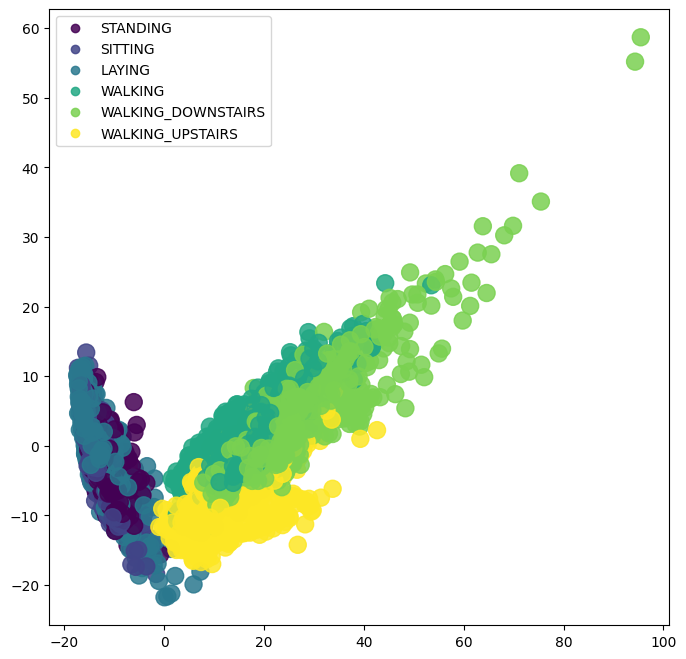

In [155]:
#colors = ListedColormap(['r','b','g'])
plt.figure(figsize=(8,8))
classes = ['STANDING', 'SITTING', 'LAYING', 'WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
scatter = plt.scatter(dfx_transform[0],dfx_transform[1],c=df.Activity,alpha=0.85,s=150)
#plt.legend(loc="upper left")
#scatter = plt.scatter(x, y, c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)